In [130]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [131]:
iris = load_iris()

In [132]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [133]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [134]:
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [135]:
# Exemplo - depois iremos apagar
df['zeros'] = [0 for i in range(150)]

In [136]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [137]:
# Remover uma coluna específica
df.drop('zeros', axis=1, inplace=True)

In [138]:
df['target'] = iris['target']

In [139]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [140]:
dic_target = {idx: val for idx,val in enumerate(iris['target_names'])}
dic_target

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [141]:
df['target_name'] = df['target'].replace(dic_target)

In [142]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Visualizações

Text(0, 0.5, 'sepal width (cm)')

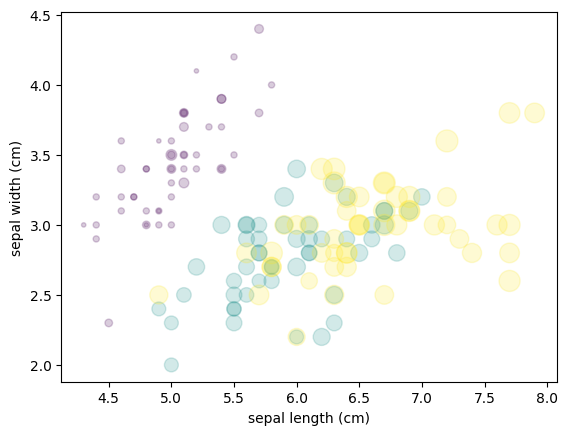

In [143]:
plt.scatter( df['sepal length (cm)'], df['sepal width (cm)'],
            s=100*df['petal width (cm)'], alpha=0.2,
            c=df['target'], cmap='viridis' )

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])


Caso queira visualizar mais dimensões podemos usar projeções

### Análise de componentes principais (PCA)

In [144]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [145]:
X = df.drop(columns=['target', 'target_name']) # passa o nome das colunas para extração
y = df['target']

In [146]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [147]:
pca.fit(X)

PCA(n_components=2)

In [148]:
X = pca.transform(X)

In [149]:
X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

Text(0, 0.5, 'PC2')

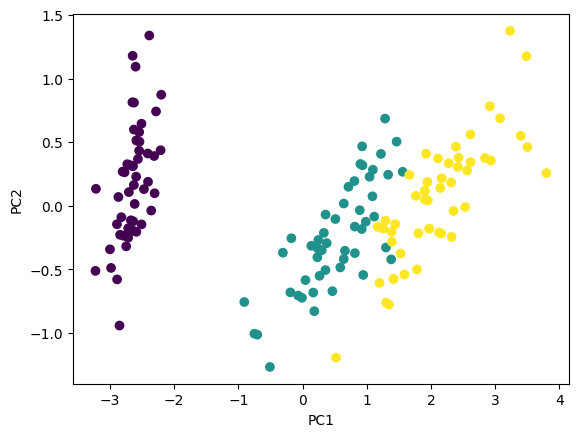

In [150]:
plt.scatter( X[: , 0], X[: , 1],
            c=y )

plt.xlabel('PC1')
plt.ylabel('PC2')

### Projeções não lineares ótimas usando t-SNE

In [151]:
from sklearn.manifold import TSNE

In [152]:
X = df.drop(columns=['target', 'target_name']) # passa o nome das colunas para extração
y = df['target']

In [153]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)

Text(0, 0.5, 'Embedding 2')

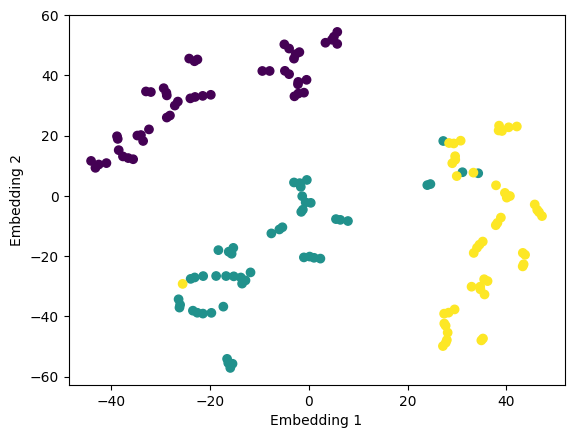

In [154]:
plt.scatter( X_embedded[: , 0], X_embedded[: , 1],
            c=y )

plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')

## Correlação

In [155]:
X = df.drop(columns=['target', 'target_name']) # passa o nome das colunas para extração

correlacao = X.corr()
correlacao



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


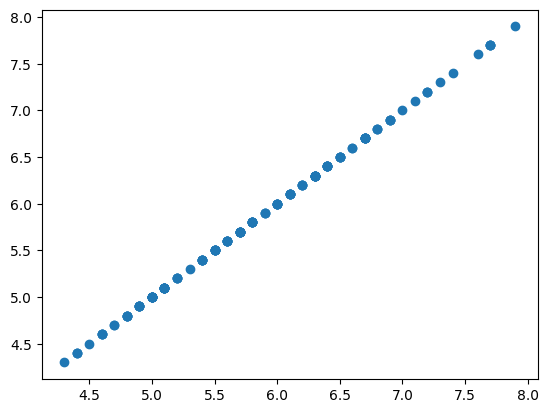

In [156]:
plt.scatter( X.iloc[: , 0], X.iloc[: , 0] )

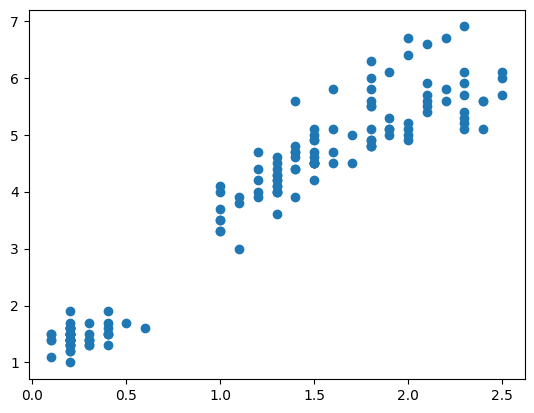

In [157]:
plt.scatter( X.iloc[: , 3], X.iloc[: , 2] )

In [162]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Visualizando a correlação entre colunas - interpolação linear (seaborn)

## Recursos de visualização do Seaborn

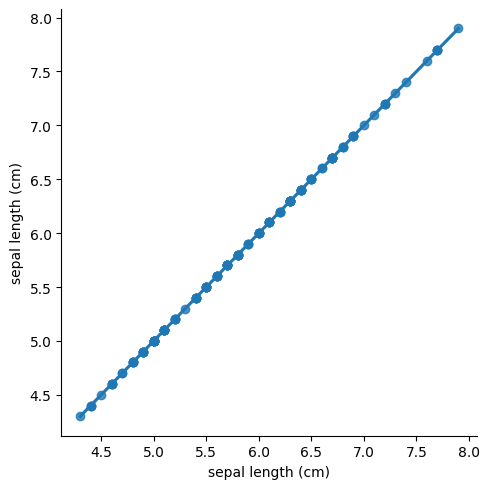

In [164]:
import seaborn as sns

sns.lmplot(x='sepal length (cm)', y='sepal length (cm)', data=X)

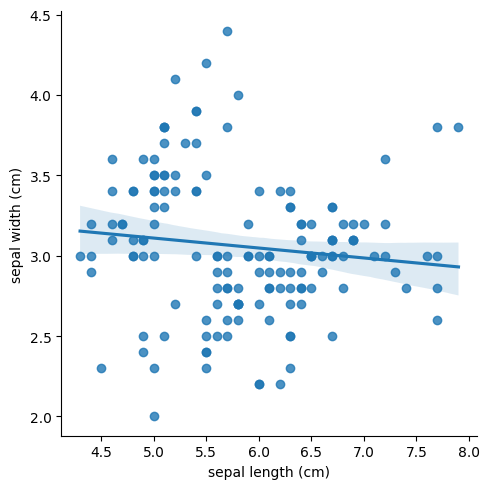

In [167]:
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=X)

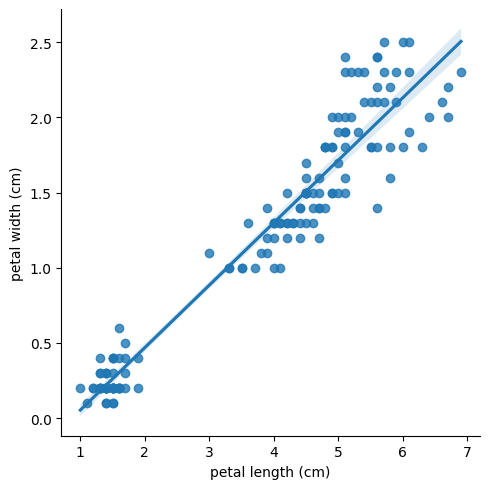

In [165]:
sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=X)

Fronteira de decisão - Exemplo ilustrativo

<Figure size 1000x600 with 0 Axes>

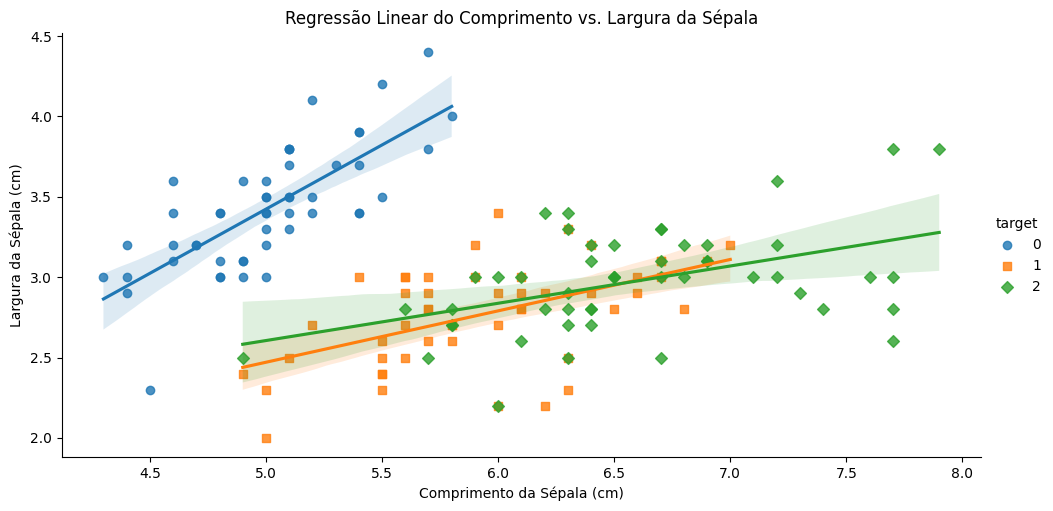

In [168]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df, aspect=2, markers=["o", "s", "D"])
plt.title('Regressão Linear do Comprimento vs. Largura da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.show()

Boxplot

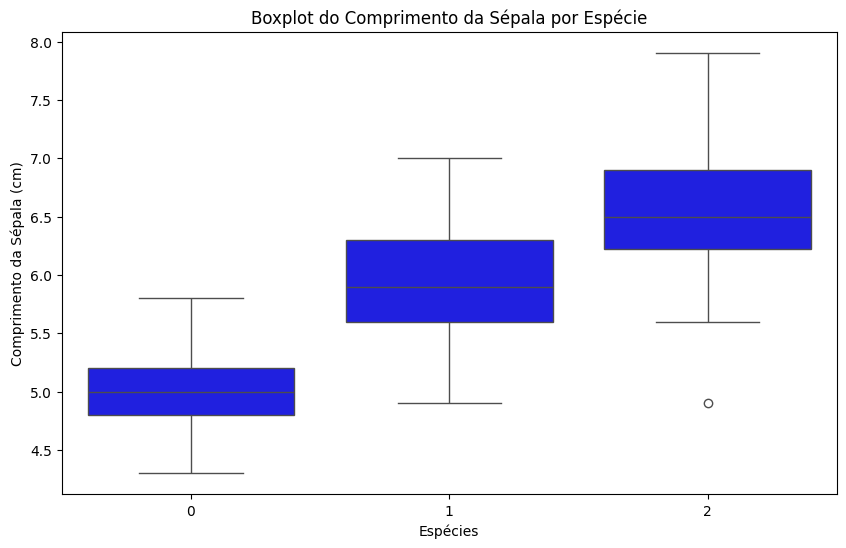

In [171]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='sepal length (cm)', data=df, color='b')
plt.title('Boxplot do Comprimento da Sépala por Espécie')
plt.xlabel('Espécies')
plt.ylabel('Comprimento da Sépala (cm)')
plt.show()

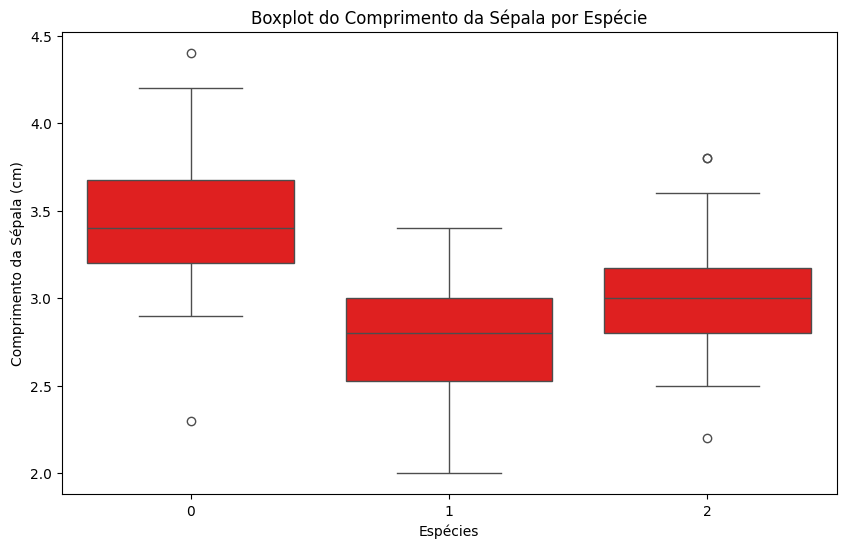

In [172]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='sepal width (cm)', data=df, color='r')
plt.title('Boxplot do Comprimento da Sépala por Espécie')
plt.xlabel('Espécies')
plt.ylabel('Comprimento da Sépala (cm)')
plt.show()

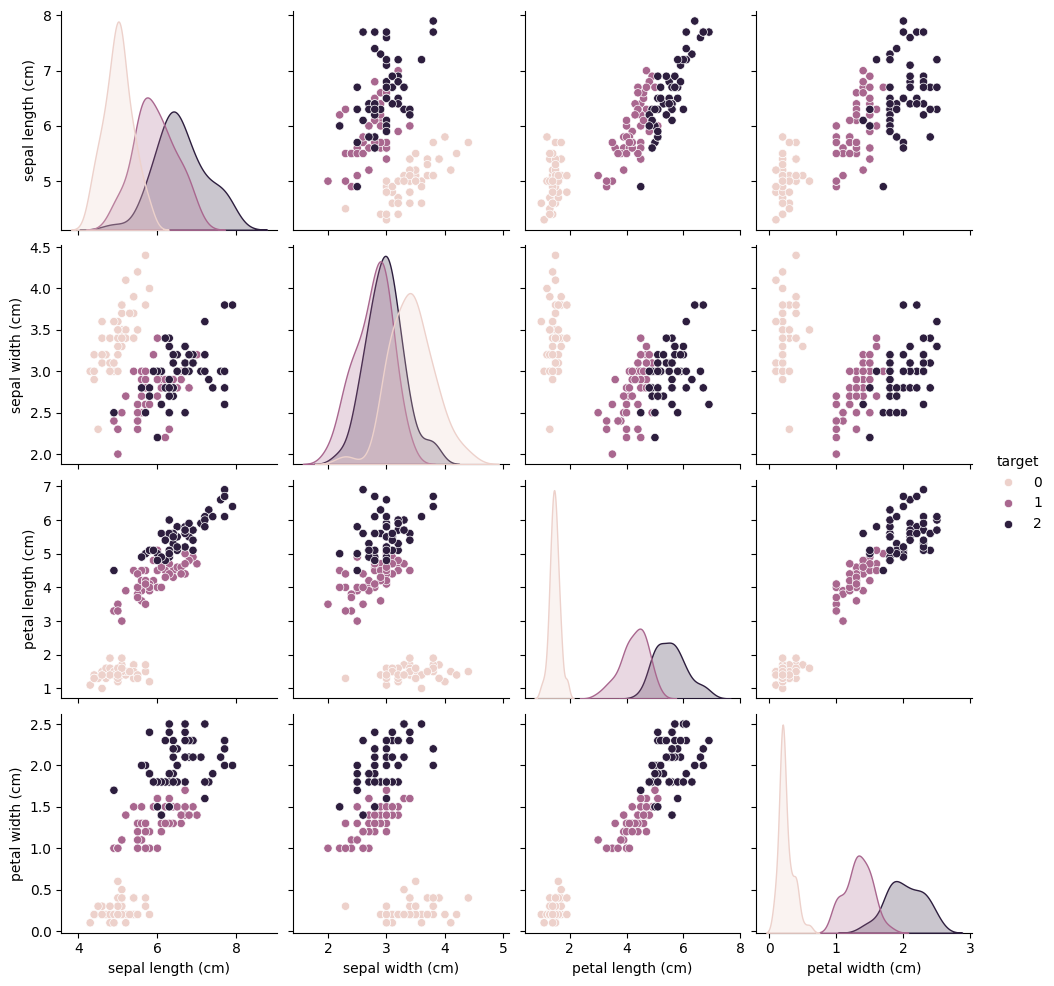

In [173]:
sns.pairplot(df, hue='target')
plt.show()

Gráfico de pizza

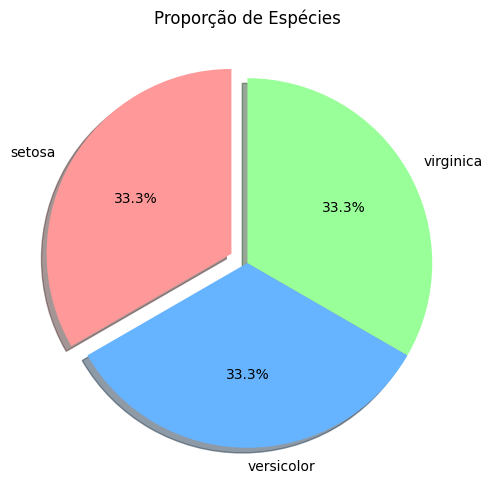

In [185]:
plt.figure(figsize=(10, 6))
sizes = df['target'].value_counts()
labels = ['setosa', 'versicolor', 'virginica']
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0.0)  # Destacar a primeira fatia

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proporção de Espécies')
plt.show()

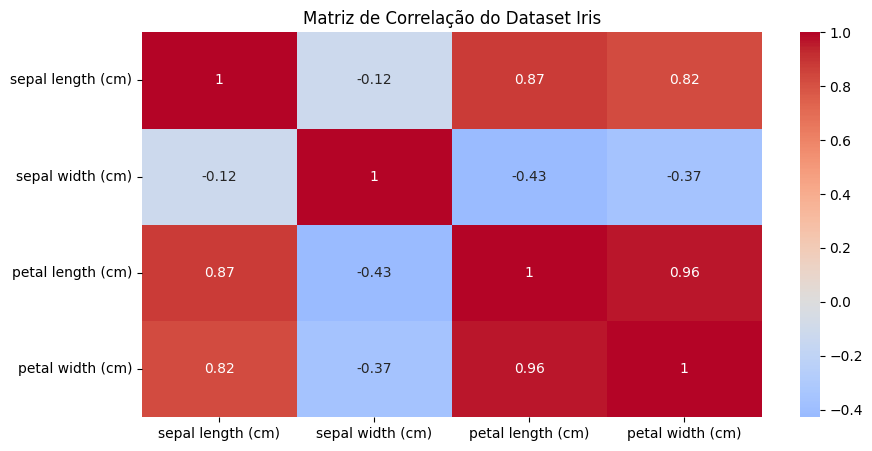

In [158]:
import seaborn as sns

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0 )
plt.title('Matriz de Correlação do Dataset Iris')
plt.show()

## Gráficos 3D

In [186]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = df.drop(columns=['target', 'target_name']) # passa o nome das colunas para extração
y = df['target']

pca.fit(X)
X = pca.transform(X)

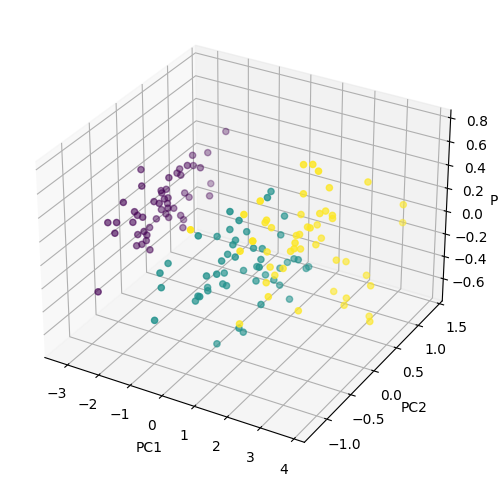

In [187]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [190]:
import plotly.express as px

df2 = pd.DataFrame(data=X, columns=['PC1', 'PC2', 'PC3'])
df2['target'] = y
df2

,PC1,PC2,PC3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0
...,...,...,...,...
145,1.944110,0.187532,0.177825,2
146,1.527167,-0.375317,-0.121898,2
147,1.764346,0.078859,0.130482,2
148,1.900942,0.116628,0.723252,2


In [192]:
# Criar o gráfico de dispersão 3D
fig = px.scatter_3d(df2, x='PC1', y='PC2', z='PC3', color='target')

# Salvar como HTML
fig.write_html('scatter_3d.html')

# Exibir no navegador
fig.show()

## Cálculo de derivadas

In [197]:
from sympy import symbols, diff, cos

x = symbols('x')

f = x**2 + 2*x + 1

In [195]:
f_prime = diff(f, x)
f_prime

2*x + 2

In [198]:
f2 = cos(x)**2

In [200]:
diff(f2, x)

-2*sin(x)*cos(x)

In [202]:
def derivada(f, x):
  h = 1E-6
  return (f(x + h) - f(x)) / h

In [211]:
def f3(x):
  return x**2+2*x+1

def f3_prime_exato(x):
  return 2*x+2

In [209]:
derivada(f3, 2)

6.000001000927568

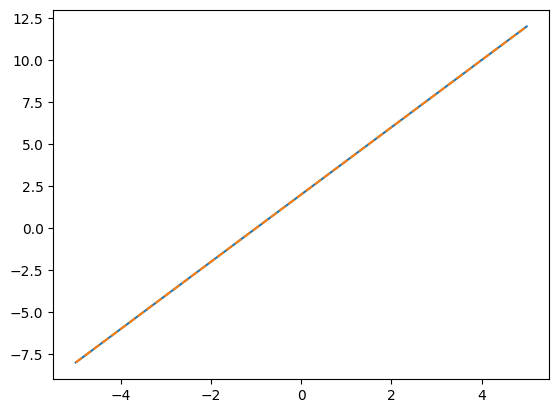

In [214]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

y2 = []
y3 = []
for xx in x:
  y2.append( derivada(f3, xx) )
  y3.append(f3_prime_exato(xx))

plt.plot(x, y2, '-', x, y3, '--')
plt.show()

In [216]:
from numpy import sin, cos

def f4(x):
  return cos(x)**2

def f4_prime_exato(x):
  return -2*sin(x)*cos(x)

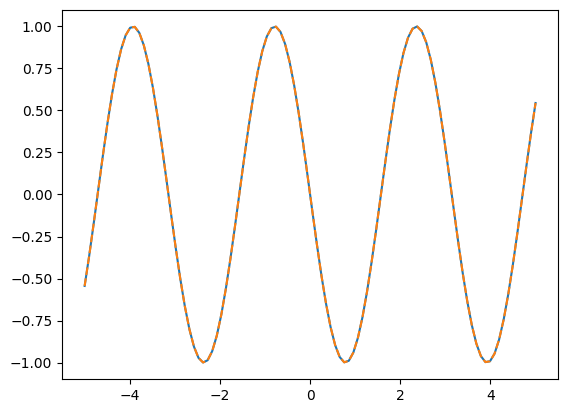

In [217]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

y2 = []
y3 = []
for xx in x:
  y2.append( derivada(f4, xx) )
  y3.append(f4_prime_exato(xx))

plt.plot(x, y2, '-', x, y3, '--')
plt.show()